In [1]:
from fears.population import Population
from fears.utils import plotter
import matplotlib.pyplot as plt

/Users/eshanking/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


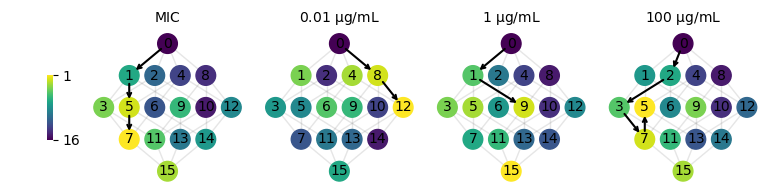

In [4]:
p = Population(fitness_data='from_file')

fig,ax_list = plt.subplots(ncols=4,figsize=(8.5,5))

arrowprops = dict(arrowstyle='->', color='black', lw=1.5,mutation_scale=7,shrinkA=6,shrinkB=6)

gen_list = [0]
indx =0
isMaximum = False

landscape_options = {'node_size':200,
                    'square':True,'node_label':'base10','arrowprops':arrowprops,
                    'resize_param':0.01,'edge_alpha':0.1,'textsize':10}

while not isMaximum:
    neighbors = p.gen_neighbors(gen_list[indx])
    fitness = p.ic50
    fitness_neighbors = [fitness[i] for i in neighbors]
    cur_fitness = fitness[gen_list[indx]]

    if max(fitness_neighbors) > cur_fitness:
        gen_list.append(neighbors[fitness_neighbors.index(max(fitness_neighbors))])
        indx += 1
    else:
        isMaximum = True

ax = ax_list[0]

plotter.plot_landscape(p,trajectory_list=[gen_list],ax=ax,fit_land=p.ic50,colorbar=True,
                       cbloc = [-0.6,0.25,0.3,0.5],cblabel='',**landscape_options)

ax.set_title('MIC',pad=10,fontsize=10)

for i,conc in enumerate([10**-2,1,10**2]):

    ax = ax_list[i+1]

    gen_list = [0]
    indx = 0
    isMaximum = False

    while not isMaximum:
        neighbors = p.gen_neighbors(gen_list[indx])
        fitness = p.gen_fit_land(conc=conc)
        fitness_neighbors = [fitness[i] for i in neighbors]
        cur_fitness = fitness[gen_list[indx]]

        if max(fitness_neighbors) > cur_fitness:
            gen_list.append(neighbors[fitness_neighbors.index(max(fitness_neighbors))])
            indx += 1
        else:
            isMaximum = True

    plotter.plot_landscape(p,conc=conc,trajectory_list=[gen_list],colorbar=False,ax=ax,
                           **landscape_options)
    
    ax.set_title(str(conc) + ' $\mathrm{\mu}$g/mL',pad=10,fontsize=10)

fig.savefig('../figures/trajectory_analysis.pdf',bbox_inches='tight')

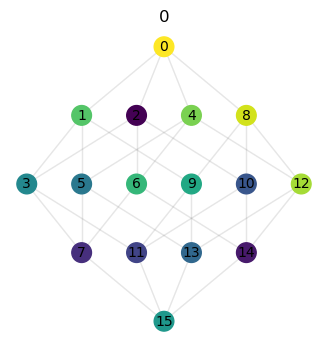

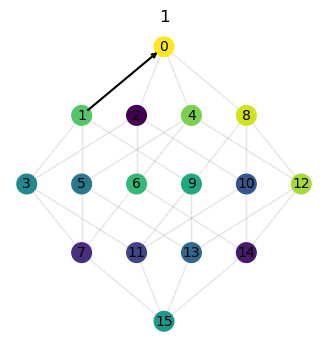

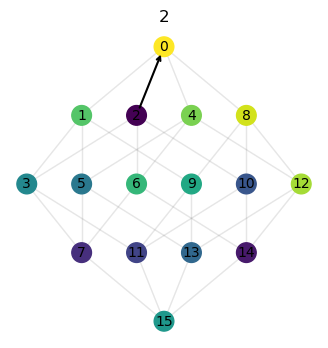

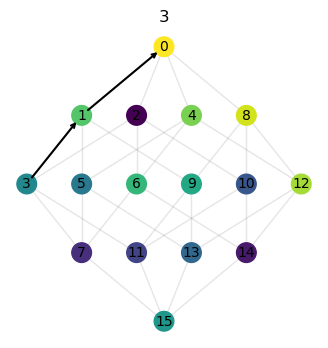

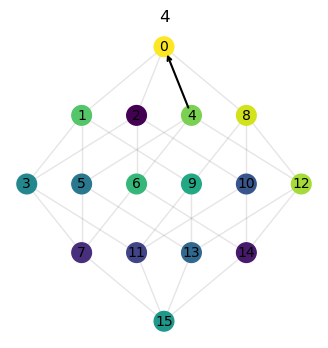

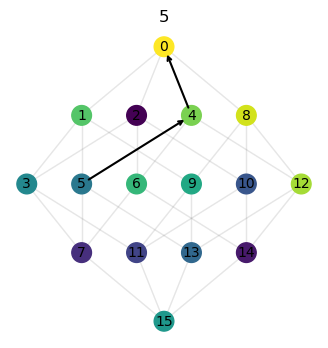

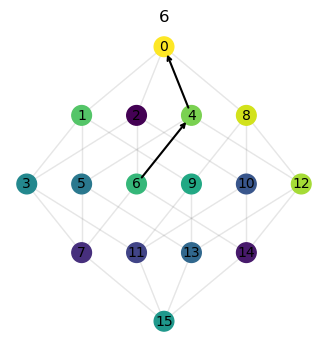

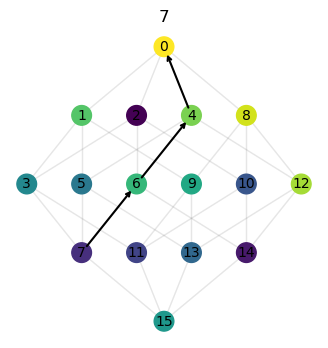

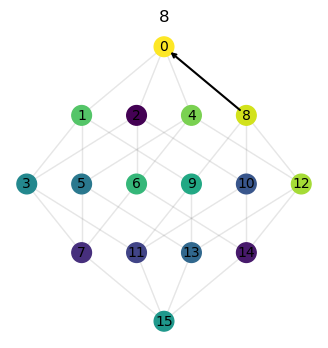

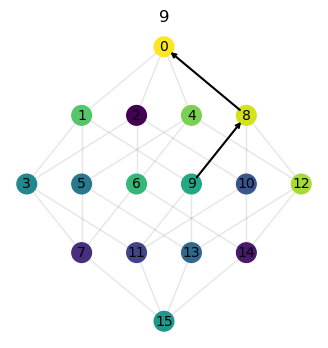

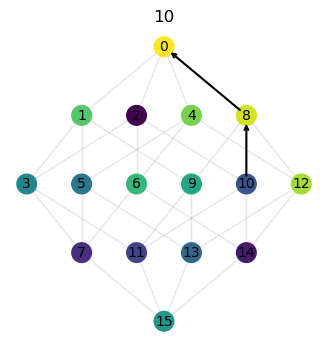

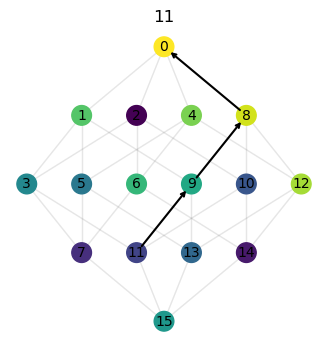

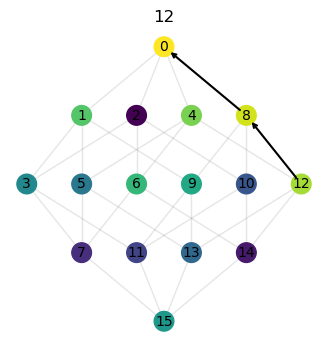

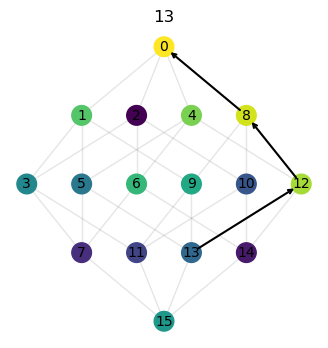

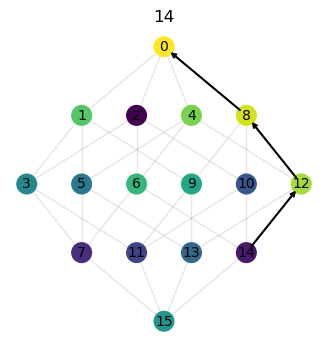

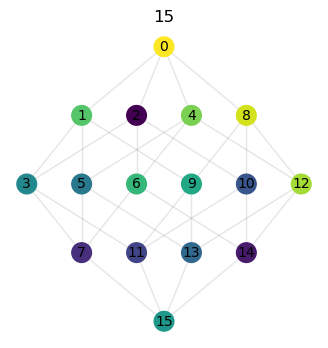

In [13]:
p = Population(fitness_data='from_file')

conc = 0

for g in range(16):

    fig,ax = plt.subplots(figsize=(4,4))

    gen_list = [g]
    indx = 0
    isMaximum = False

    while not isMaximum:
        neighbors = p.gen_neighbors(gen_list[indx])
        fitness = p.gen_fit_land(conc=conc)
        fitness_neighbors = [fitness[i] for i in neighbors]
        cur_fitness = fitness[gen_list[indx]]

        if max(fitness_neighbors) > cur_fitness:
            gen_list.append(neighbors[fitness_neighbors.index(max(fitness_neighbors))])
            indx += 1
        else:
            isMaximum = True

    plotter.plot_landscape(p,conc=conc,trajectory_list=[gen_list],colorbar=False,ax=ax,
                           **landscape_options)
    
    ax.set_title(str(g))

fig.savefig('../figures/trajectory_analysis.pdf',bbox_inches='tight')